In [1]:
# To display full output in Notebook, instead of only the last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Please make sure Jupyter Notebook environment is running a Python 3 kernel 
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."
%autosave 120
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #plotting graphs 
import seaborn as sns # used for plot interactive graph.
from scipy import stats
# statistical analysis

Autosaving every 120 seconds


## TOC:
* [January](#jan)
* [February](#feb)
* [March](#mar)
* [First Quarter](#fqa)

* [April](#apr)
* [May](#may)
* [June](#jun)
* [Second Quarter](#sqa)

* [July](#jul)
* [August](#aug)
* [September](#sep)
* [Third Quarter](#tqa)

In [3]:
df_inputs = pd.read_csv('fscData/fscDataInputsCleaned.csv')
df_agg = pd.read_csv('fscData/fscDataAggCleaned.csv')
df_fin = pd.read_csv('fscData/fscDataFinCleaned.csv')
df_mech = pd.read_csv('fscData/fscDataMechCleaned.csv')
df_ind = pd.read_csv('fscData/fscDataIndivCleaned.csv')

In [4]:
df_inputs.head()
df_agg.head()
df_fin.head()
df_mech.head()
df_ind.head()

,County,Month,Week,fscName,inputName,Category,Type,companyInvolved,unit,Quantity,Value,Commision Earned
0,Tharaka Nithi,1,2,Magdalene Kiarie,Profen,Crop protection,Pest and desease control,Agrichem Africa Limited,Mls,100,600,0
1,Tharaka Nithi,1,2,Magdalene Kiarie,Booster,Crop Nutrition,Foliar,Agrosolutions Ltd,Mls,750,950,0
2,Meru,1,2,Solomon Muthee,Apical root cuttings,Seeds,Seeds,Apical Root Cuttings,Pieces,100,1000,0
3,Tharaka Nithi,1,2,Magdalene Kiarie,Herbistar,Crop protection,Herbicide,Gov PL,Mls,200,2200,0
4,Tharaka Nithi,1,2,Magdalene Kiarie,Escort,Crop protection,Pest and desease control,Greenlife,Mls,600,3850,0


,County,Month,Week,fscName,crop,kgAgg,kgSold,Sold MT,buyerName,unitPrice,Value,Commission Earned,Number of Male farmers who sold,Number of Female farmers who sold,Total
0,Nakuru,8,1,MIKE TESOT,Potatoes,11250,11250,11.25,Joel Tum,21.0,236250,7500,2,0,2
1,Nakuru,8,1,MIKE TESOT,Potatoes,25500,25500,25.50,Joel Tum,21.0,535500,"17,000",3,2,5
2,Nakuru,8,1,ALEX MACHARIA,Potatoes,37500,37500,37.50,David Murosi,21.0,787500,25000,4,1,5
3,Nakuru,8,1,ALEX MACHARIA,Potatoes,22500,22500,22.50,JOSEPH WAMBUGU,20.0,450000,"15,000",1,2,3
4,Nakuru,8,1,ALEX MACHARIA,Potatoes,15000,15000,15.00,JOSEPH WAMBUGU,21.0,315000,10000,1,2,3


,County,Month,Week,fscName,finGroup,newLoans,newLoanValue,farmersRepaid,Commision Earned
0,Meru,1,4,Isabella Paul,Sunculture,4,625000,19,18430
1,Nakuru,2,3,Collins Rotich,Vision Fund,16,"73,600",16,0
2,Kakamega,2,4,Benjamin Wanguba,OAF,11,54564,11,0
3,Meru,2,4,Mark Mwendia,Credit Factory,4,46000,4,440
4,Nakuru,2,4,Lily Cherotich,Mokuns Sacco,20,"100,000",0,0


,County,Month,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Value,Commision Earned,Male,Female,Total
0,Busia,1,1,Marlone Awillie,Moses Wejulu,Mechanisation,Ploughing,21.0,58800,2100,3,2,5.0
1,Busia,1,2,Amos Magero,Peter Wanga,Mechanisation,Ploughing,13.0,36400,1300,2,2,4.0
2,Busia,1,2,Florence Nabwire,Michael ochieng,Mechanisation,Ploughing,8.0,22400,800,1,3,4.0
3,Busia,1,2,Elder Mariamu Omurayi,Trix Magoba,Mechanisation,Ploughing,3.0,7500,300,3,0,3.0
4,Busia,1,2,Shadrack Okuku,Trix Magoba,Mechanisation,Ploughing,1.0,2800,100,1,0,1.0


,name,County,input_value,input_comm,mech_value,mech_comm,agg_total,agg_comm,fin_value,fin_comm,grand_total,grand_total_commission
0,Godfrey Mwongora,Meru,"5,405,652","79,100","29,000",0,"88,979,000","371,000","141,000",0,"94,554,652","450,100"
1,Solomon Muthee,Meru,"71,215","6,885",0,0,"59,226,247","2,627,252","395,000","1,000","59,692,462","2,635,137"
2,Abraham Nganga,Nyandarua,"14,337,110","2,298,138","675,500","73,700","23,418,994","1,047,325","300,000",0,"38,731,604","3,419,163"
3,Lily Cherotich,Nakuru,"2,467,250","116,604","30,000","2,400","35,886,300","2,036,750","100,000",0,"38,483,550","2,155,754"
4,Everest Ogembo,Migori,"75,650","2,040",0,0,"29,866,098","72,536",0,0,"29,941,748","74,576"


In [5]:
common = set.intersection(set(df_inputs.fscName), set(df_agg.fscName), set(df_mech.fscName), set(df_fin.fscName))
print(common)

set()


In [6]:
#pd.concat([
    #df1[df1.Col1.isin(common)],
    #df2[df2.Col1.isin(common)],
    #df3[df3.Col1.isin(common)]]).sort_values(by='Col1')

In [7]:
df_agg.sort_values(by=['Commission Earned','Month'])

,County,Month,Week,fscName,crop,kgAgg,kgSold,Sold MT,buyerName,unitPrice,Value,Commission Earned,Number of Male farmers who sold,Number of Female farmers who sold,Total
195,Meru,8,4,GODFREY MWONGORA,Wheat,350000,350000,350.00,James Kanji,50.0,17500000,0,5,1,6
253,Nyandarua,9,2,CILIAH MUHORO,Potatoes,12860,12860,12.86,James Kanyingi,19.4,249484,0,2,9,11
283,Nyandarua,9,3,BARBANAS KARIUKI,Potatoes,13200,13200,13.20,Stanley Mwiti,20.0,264000,0,1,0,1
27,Busia,8,1,Henderica Okwayo,Sorghum,200,200,0.20,Western Dry Foods Ltd,32.0,6400,100,1,0,1
146,Migori,8,3,FRANCIS BABU,soya,200,200,0.20,LEMOZE,50.0,10000,1000,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Siaya,8,3,SAMUEL OTANA MAWERE,Sorghum,10800,10800,10.80,EASTCOM FOODS LTD,30.0,324000,9720,13,4,17
254,Narok,9,2,PETER MBUGUA,Potatoes,98650,98650,98.65,Ester Kaguora,21.0,2071650,98650,16,1,17
285,Narok,9,3,PETER TANYASIS,Potatoes,98670,98670,98.67,Viazi Kings,25.0,2466750,98670,7,3,10
147,Siaya,8,4,PATRICIA OYUGI,Sorghum,1980,1980,1.98,UHOLO HOLDINGS,32.0,63360,990,5,11,16


In [8]:
replace_values = {'-':np.nan}
df_agg['Commission Earned'] = df_agg['Commission Earned'].replace(replace_values)
df_agg.sort_values(by=['Commission Earned','Month'])
df_agg.isnull().sum()
df_agg = df_agg.dropna()
df_agg

,County,Month,Week,fscName,crop,kgAgg,kgSold,Sold MT,buyerName,unitPrice,Value,Commission Earned,Number of Male farmers who sold,Number of Female farmers who sold,Total
195,Meru,8,4,GODFREY MWONGORA,Wheat,350000,350000,350.00,James Kanji,50.0,17500000,0,5,1,6
253,Nyandarua,9,2,CILIAH MUHORO,Potatoes,12860,12860,12.86,James Kanyingi,19.4,249484,0,2,9,11
283,Nyandarua,9,3,BARBANAS KARIUKI,Potatoes,13200,13200,13.20,Stanley Mwiti,20.0,264000,0,1,0,1
27,Busia,8,1,Henderica Okwayo,Sorghum,200,200,0.20,Western Dry Foods Ltd,32.0,6400,100,1,0,1
146,Migori,8,3,FRANCIS BABU,soya,200,200,0.20,LEMOZE,50.0,10000,1000,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Siaya,8,3,SAMUEL OTANA MAWERE,Sorghum,10800,10800,10.80,EASTCOM FOODS LTD,30.0,324000,9720,13,4,17
254,Narok,9,2,PETER MBUGUA,Potatoes,98650,98650,98.65,Ester Kaguora,21.0,2071650,98650,16,1,17
285,Narok,9,3,PETER TANYASIS,Potatoes,98670,98670,98.67,Viazi Kings,25.0,2466750,98670,7,3,10
147,Siaya,8,4,PATRICIA OYUGI,Sorghum,1980,1980,1.98,UHOLO HOLDINGS,32.0,63360,990,5,11,16


County                               0
Month                                0
Week                                 0
fscName                              0
crop                                 0
kgAgg                                0
kgSold                               0
Sold MT                              0
buyerName                            0
unitPrice                            0
Value                                0
Commission Earned                    0
Number of Male farmers who sold      0
Number of Female farmers who sold    0
Total                                0
dtype: int64

,County,Month,Week,fscName,crop,kgAgg,kgSold,Sold MT,buyerName,unitPrice,Value,Commission Earned,Number of Male farmers who sold,Number of Female farmers who sold,Total
0,Nakuru,8,1,MIKE TESOT,Potatoes,11250,11250,11.25,Joel Tum,21.00,236250,7500,2,0,2
1,Nakuru,8,1,MIKE TESOT,Potatoes,25500,25500,25.50,Joel Tum,21.00,535500,"17,000",3,2,5
2,Nakuru,8,1,ALEX MACHARIA,Potatoes,37500,37500,37.50,David Murosi,21.00,787500,25000,4,1,5
3,Nakuru,8,1,ALEX MACHARIA,Potatoes,22500,22500,22.50,JOSEPH WAMBUGU,20.00,450000,"15,000",1,2,3
4,Nakuru,8,1,ALEX MACHARIA,Potatoes,15000,15000,15.00,JOSEPH WAMBUGU,21.00,315000,10000,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,Nakuru,11,4,NOAH RONO,Potatoes,21000,21000,21.00,Joel Tum,27.00,567000,14000,3,1,4
391,Nakuru,11,4,MIKE TESOT,Potatoes,24000,24000,24.00,Wesley Ngeno,25.00,600000,16000,4,1,5
392,Nakuru,11,4,VINCENT KOECH,Potatoes,24000,24000,24.00,Henry Kimeli,29.00,696000,16000,5,2,7
393,Nakuru,11,4,JOHN MAINA MWANGI,Potatoes,34500,34500,34.50,Willy Cheruiyot,25.00,862500,23000,4,1,5


In [9]:
com_mth = df_agg.sort_values(['Commission Earned'], ascending=False)

In [10]:
com_mth.info()
com_mth = com_mth[['Month','Week','fscName','crop', 'Commission Earned','Total']]
com_mth['Commission Earned'] = (com_mth['Commission Earned'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
com_mth.astype({'Commission Earned': 'float64'}).dtypes
com_mth

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 151 to 283
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   County                             395 non-null    object 
 1   Month                              395 non-null    int64  
 2   Week                               395 non-null    int64  
 3   fscName                            395 non-null    object 
 4   crop                               395 non-null    object 
 5   kgAgg                              395 non-null    object 
 6   kgSold                             395 non-null    object 
 7   Sold MT                            395 non-null    float64
 8   buyerName                          395 non-null    object 
 9   unitPrice                          395 non-null    float64
 10  Value                              395 non-null    object 
 11  Commission Earned                  395 non-null    objec

Month                  int64
Week                   int64
fscName               object
crop                  object
Commission Earned    float64
Total                  int64
dtype: object

,Month,Week,fscName,crop,Commission Earned,Total
151,8,4,JAMES OLUM,Sorghum,9900.0,27
147,8,4,PATRICIA OYUGI,Sorghum,990.0,16
285,9,3,PETER TANYASIS,Potatoes,98670.0,10
254,9,2,PETER MBUGUA,Potatoes,98650.0,17
84,8,2,SAMUEL NYAPOLA,Maize,9720.0,13
...,...,...,...,...,...,...
146,8,3,FRANCIS BABU,soya,1000.0,3
27,8,1,Henderica Okwayo,Sorghum,100.0,1
195,8,4,GODFREY MWONGORA,Wheat,0.0,6
253,9,2,CILIAH MUHORO,Potatoes,0.0,11


In [11]:
com_mth['Week'] = com_mth['Week'].replace({1 :int(1)})
com_mth.astype({'Week': 'int64'}).dtypes

Month                  int64
Week                   int64
fscName               object
crop                  object
Commission Earned    float64
Total                  int64
dtype: object

# AUGUST  <a class="anchor" id="aug"></a>

,Week,fscName,crop,Commission Earned,Total
21,1,JAMES OLUM,Sorghum,1035.0,7
42,1,JOSEPHAT OKISIANG,Maize,17400.0,21
15,1,PATRICIA OYUGI,Sorghum,1755.0,10
12,1,Emily Akinyi,Sorghum,675.0,2
20,1,MILKA AKINYI,Sorghum,1755.0,18
...,...,...,...,...,...
169,4,ABRAHAM NGANGA,Potatoes,32000.0,3
186,4,JONATHAN SUTER,Potatoes,34200.0,6
182,4,LILY CHEROTICH,Potatoes,35000.0,11
196,4,SAMSON SAWO,Soya,24000.0,19


,Week,fscName,crop,Commission Earned,Total
21,1,JAMES OLUM,Sorghum,1035.0,7
42,1,JOSEPHAT OKISIANG,Maize,17400.0,21
15,1,PATRICIA OYUGI,Sorghum,1755.0,10
12,1,Emily Akinyi,Sorghum,675.0,2
20,1,MILKA AKINYI,Sorghum,1755.0,18
22,1,JACINTA ADHAYA OCHIENG,Green Grams,600.0,10
37,1,EVERLYNE NDAKWA,Maize,10000.0,24
5,1,RICHARD MBARIA,Potatoes,15000.0,2
44,1,Rhoda Oduma,Maize,20000.0,39
19,1,ALICE ATIENO ANJINJA,Sorghum,2700.0,16


,Week,fscName,crop,Commission Earned,Total
82,2,LAVENDER ACHIENG,Maize,9450.0,17
73,2,FRANCIS ODUOR,Beans,4320.0,9
54,2,VINCENT KOECH,Potatoes,9000.0,4
72,2,DAVID ONYUNDE,Beans,14040.0,19
62,2,NOAH OWUOR,Sorghum,4005.0,13
93,2,SAMUEL BABERI,Maize,13050.0,13
77,2,Emily Akinyi,Soya,1200.0,7
60,2,SAMSON SAWO,Soya,28000.0,24
89,2,PATRICK MUKANDA,Sorghum,250.0,1
80,2,LUCAS ONYANGO,Maize,11160.0,23


,Week,fscName,crop,Commission Earned,Total
99,3,PATRICIA OYUGI,Sorghum,2655.0,19
114,3,JOSEPH NDIRANGU,Potatoes,14000.0,5
124,3,joan cheserem,Potatoes,26200.0,6
126,3,PETER AYIEKO,Sorghum,40000.0,61
145,3,RUFUS SIRERE YENKO,Potatoes,25600.0,7
108,3,ROLLY ACHIENG OTIENO,Sorghum,25000.0,45
128,3,DOMINIC OKUNGU,Sorghum,24450.0,15
113,3,RICHARD MBARIA,Potatoes,14450.0,6
101,3,NOAH OWUOR,Sorghum,2340.0,18
115,3,VINCENT KOECH,Potatoes,23000.0,7


,Week,fscName,crop,Commission Earned,Total
167,4,WILLIS OMONDI,Rice,1600.0,5
168,4,MILKA OLUOCH,Soya,12500.0,14
171,4,WATSON WACHIRA,Potatoes,1000.0,1
185,4,JAMES KIPTOO,Potatoes,10000.0,2
191,4,JAMES KIPTOO,Potatoes,10400.0,6
173,4,JOSEPH NDIRANGU,Potatoes,12000.0,3
165,4,MILKA OLUOCH,Sorghum,1500.0,6
187,4,JONATHAN SUTER,Potatoes,11400.0,6
172,4,PETER KIRAGU,Potatoes,102000.0,6
180,4,NOAH RONO,Potatoes,15000.0,4


,Week,Average Commision
0,32,9038.811111
1,33,12689.428571
2,34,25043.547170
3,35,20738.839286


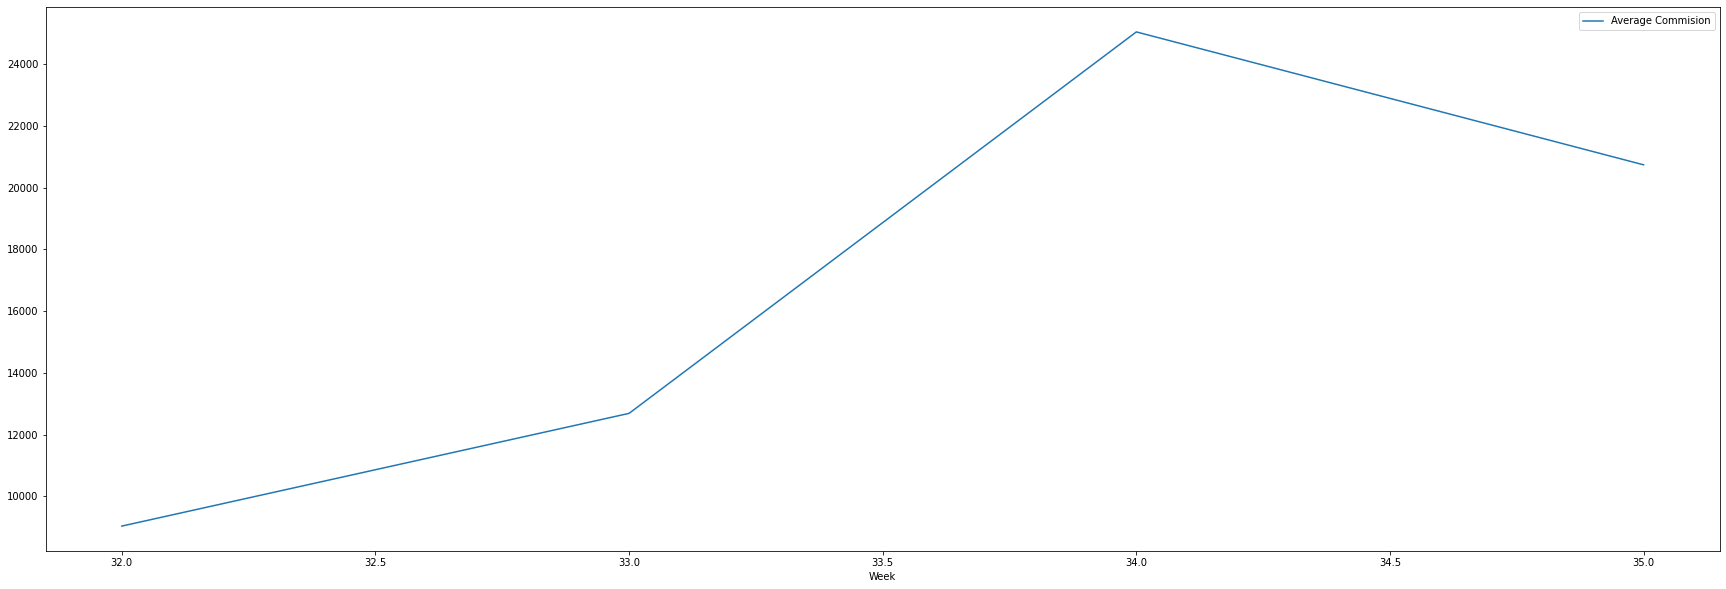

In [12]:
#getting the values for specific months
com_aug = com_mth[com_mth['Month']==8]
com_aug = com_aug.sort_values(by='Week')
com_aug = com_aug.drop(columns=['Month'])
com_aug

#getting the values for each week
wk1 = com_aug[com_aug['Week']== 1]
wk1

wk2 = com_aug[com_aug['Week']== 2]
wk2

wk3 = com_aug[com_aug['Week']== 3]
wk3 

wk4 = com_aug[com_aug['Week']== 4]
wk4


d = {'Week': [32, 33, 34, 35], 
     'Average Commision': [ wk1['Commission Earned'].mean(),
                             wk2['Commission Earned'].mean(),
                             wk3['Commission Earned'].mean(),
                             wk4['Commission Earned'].mean()]}

augAvgComm = pd.DataFrame(data=d)
augAvgComm
augAvg_graph = augAvgComm.plot.line(x='Week', y='Average Commision', figsize=(30,10))

# SEPTEMBER <a class="anchor" id="sep"></a>

,Week,fscName,crop,Commission Earned,Total
235,1,JUSTUS NAITUTAE,Potatoes,45670.0,10
234,1,BENSON SANAMWALA,Potatoes,5670.0,2
231,1,PETER MAINA,Potatoes,55890.0,9
209,1,MIKE TESOT,Potatoes,10000.0,2
224,1,PAMELLA ODHIAMBO,Maize,5500.0,26
...,...,...,...,...,...
318,5,MIKE TESOT,Potatoes,15000.0,3
321,5,JOSEPH NDIRANGU,Potatoes,12000.0,3
317,5,PETER KIRAGU,Potatoes,22000.0,1
319,5,RICHARD MBARIA,Potatoes,10000.0,2


,Week,fscName,crop,Commission Earned,Total
235,1,JUSTUS NAITUTAE,Potatoes,45670.0,10
234,1,BENSON SANAMWALA,Potatoes,5670.0,2
231,1,PETER MAINA,Potatoes,55890.0,9
209,1,MIKE TESOT,Potatoes,10000.0,2
224,1,PAMELLA ODHIAMBO,Maize,5500.0,26
225,1,JOSEPH NYALANDO,Maize,5300.0,18
245,1,ELDER MARIAMU OMURAYI,Sorghum,5000.0,23
213,1,VINCENT KOECH,Potatoes,11000.0,2
241,1,CENCINTA NDULU,Potatoes,148420.0,11
243,1,JULIA MARUNGU,Sorghum,4157.5,27


,Week,fscName,crop,Commission Earned,Total
275,2,ALPHANUS OCHURA,Maize,20400.0,32
279,2,Emily Akinyi,Sorghum,1512.0,4
260,2,JOAN CHESEREM,Potatoes,9000.0,2
259,2,KENNEDY SPOIA,Potatoes,88400.0,7
272,2,RINA MUKUNGU,Soya,23530.0,31
255,2,ESTHER RESON PUNYUA,Potatoes,89580.0,15
264,2,JOSEPH NDIRANGU,Potatoes,18000.0,5
273,2,LAWRENCE MUKABANE,Maize,18000.0,5
280,2,SUSAN SEWE,Sorghum,1710.0,15
268,2,ROBERT KOSKEI,Potatoes,21500.0,6


,Week,fscName,crop,Commission Earned,Total
282,3,WATSON WACHIRA,Cabbages,1000.0,1
305,3,PETER IMBUSI,Maize,13000.0,18
291,3,ALEX MACHARIA,Potatoes,10000.0,2
295,3,RICHARD MBARIA,Potatoes,12500.0,3
310,3,JACINTA ADHAYA OCHIENG,Maize,12000.0,12
299,3,Mathew Gachiri,Potatoes,12000.0,3
286,3,PETER TANYASIS,Potatoes,119200.0,17
289,3,JONATHAN SUTER,Potatoes,11400.0,8
309,3,MILKA OLUOCH,Maize,10000.0,10
292,3,MIKE TESOT,Potatoes,10000.0,3


,Week,fscName,crop,Commission Earned,Total
312,4,ABRAHAM NGANGA,Potatoes,45000.0,4
315,4,PETER IMBUSI,Maize,20000.0,1
311,4,ABRAHAM NGANGA,Potatoes,70000.0,3
316,4,LAWRENCE MUKABANE,Maize,8500.0,3
314,4,PHILEMON CHERUYOT,Potatoes,150000.0,20
313,4,PETER KIRAGU,Potatoes,30000.0,1


,Week,fscName,crop,Commission Earned,Total
322,5,PHILIP KIPKORIR,Potatoes,30000.0,8
318,5,MIKE TESOT,Potatoes,15000.0,3
321,5,JOSEPH NDIRANGU,Potatoes,12000.0,3
317,5,PETER KIRAGU,Potatoes,22000.0,1
319,5,RICHARD MBARIA,Potatoes,10000.0,2
320,5,JOSEPH NDIRANGU,Potatoes,13000.0,3


,Week,Average Commision
0,36,20010.650000
1,37,26363.310345
2,38,22776.206897
3,39,53916.666667
4,40,17000.000000


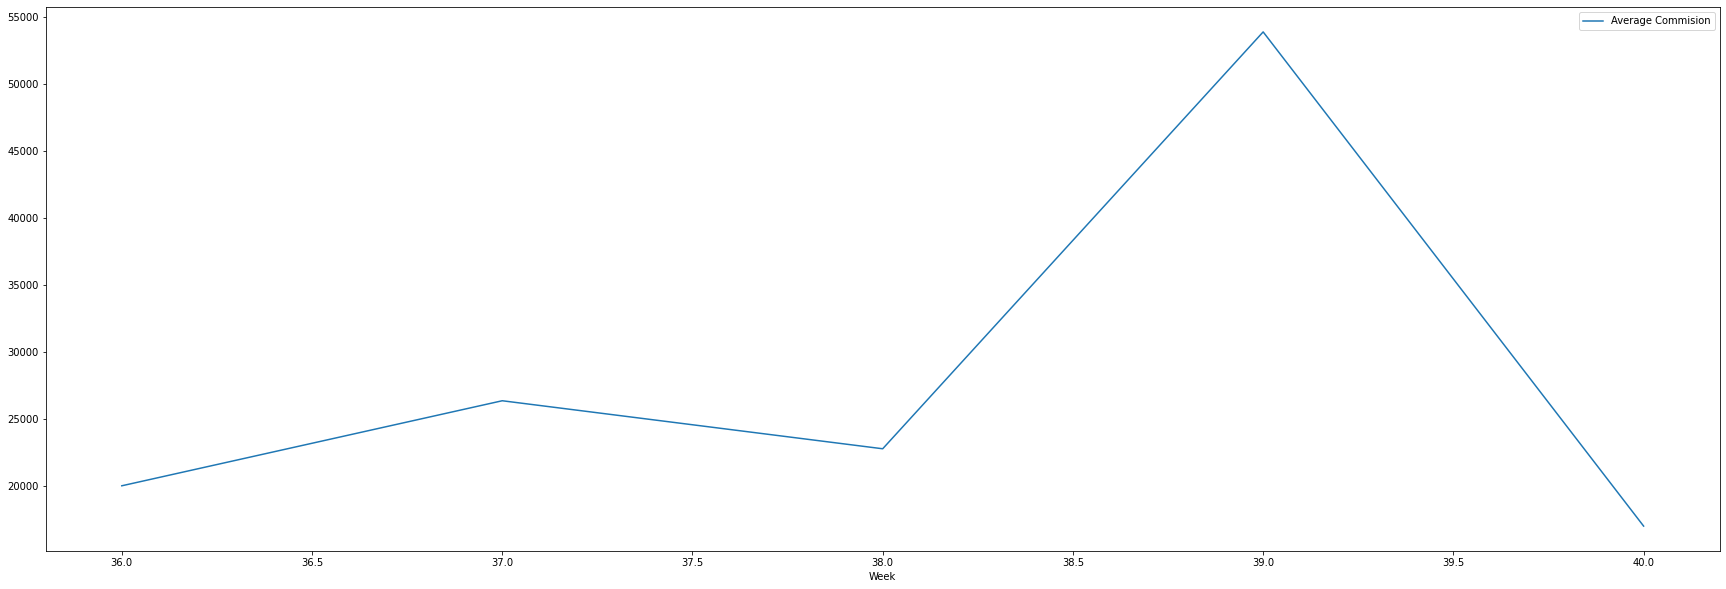

In [13]:
#getting the values for specific months
com_sep = com_mth[com_mth['Month']==9]
com_sep = com_sep.sort_values(by='Week')
com_sep = com_sep.drop(columns=['Month'])
com_sep

#getting the values for each week
wk1 = com_sep[com_sep['Week']== 1]
wk1

wk2 = com_sep[com_sep['Week']== 2]
wk2

wk3 = com_sep[com_sep['Week']== 3]
wk3 

wk4 = com_sep[com_sep['Week']== 4]
wk4

wk5 = com_sep[com_sep['Week']== 5]
wk5

d = {'Week': [36, 37, 38, 39, 40], 
     'Average Commision': [ wk1['Commission Earned'].mean(),
                             wk2['Commission Earned'].mean(),
                             wk3['Commission Earned'].mean(),
                             wk4['Commission Earned'].mean(),
                             wk5['Commission Earned'].mean()]}

sepAvgComm = pd.DataFrame(data=d)
sepAvgComm
sepAvg_graph = sepAvgComm.plot.line(x='Week', y='Average Commision', figsize=(30,10))

# THIRD QUARTER AVERAGE<a class="anchor" id="tqa"></a>

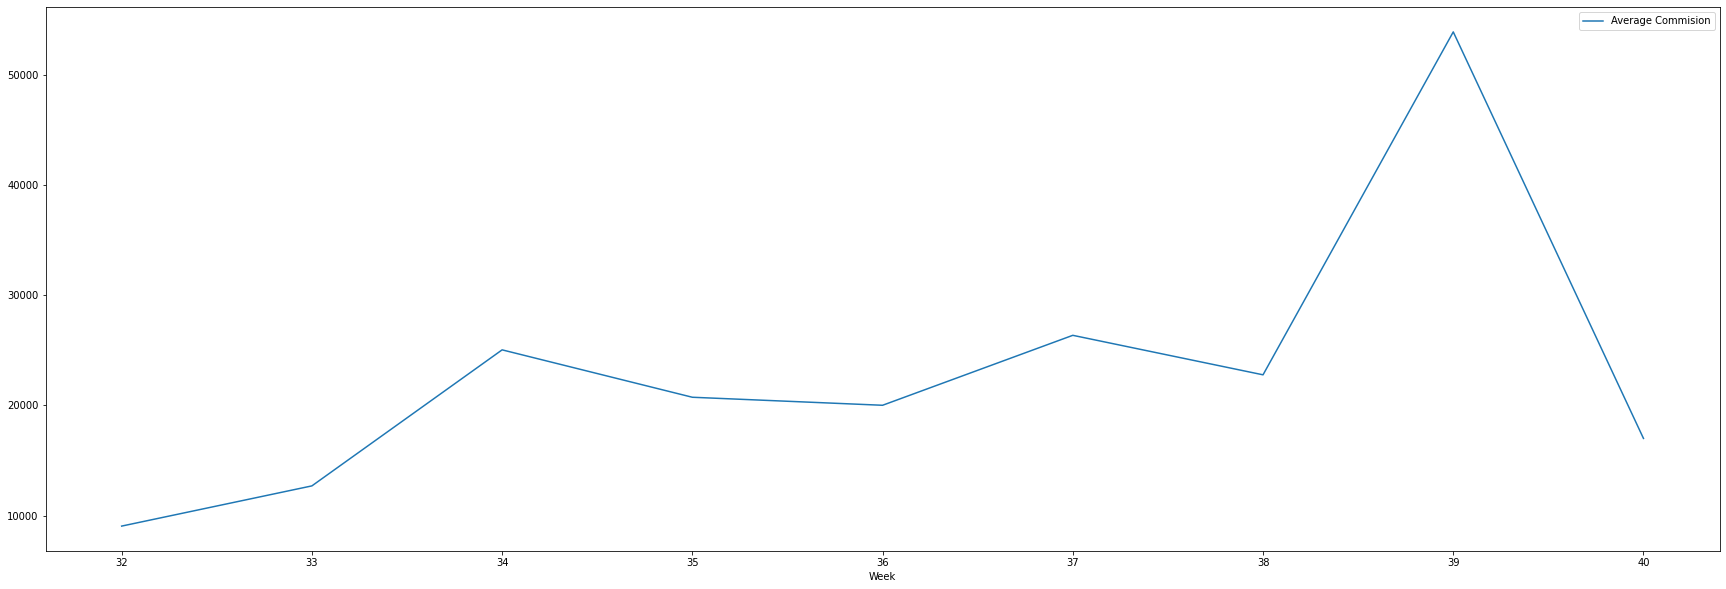

In [14]:
thirdQuarter = [ augAvgComm, sepAvgComm]

thirdQ = pd.concat(thirdQuarter)

thirdQgraph = thirdQ.plot.line(x='Week', y='Average Commision', figsize=(30,10))

# OCTOBER <a class="anchor" id="oct"></a>

,Week,fscName,crop,Commission Earned,Total
329,1,JAMES KIPTOO,Potatoes,16900.0,6
335,1,SAMUEL BABERI,Maize,16940.0,16
327,1,WYCLIFFE BET,Potatoes,1350.0,1
325,1,JOSEPH NDIRANGU,Potatoes,11500.0,5
333,1,EVANS KEMBOI CHEBII,Potatoes,21600.0,5
328,1,JAMES KIPTOO,Potatoes,22900.0,6
326,1,ROBERT KOSKEI,Potatoes,11500.0,3
334,1,EVANS KEMBOI CHEBII,Potatoes,14000.0,4
330,1,JAMES KIPTOO,Potatoes,16300.0,9
331,1,JAMES KIPTOO,Potatoes,6300.0,5


,Week,fscName,crop,Commission Earned,Total
329,1,JAMES KIPTOO,Potatoes,16900.0,6
335,1,SAMUEL BABERI,Maize,16940.0,16
327,1,WYCLIFFE BET,Potatoes,1350.0,1
325,1,JOSEPH NDIRANGU,Potatoes,11500.0,5
333,1,EVANS KEMBOI CHEBII,Potatoes,21600.0,5
328,1,JAMES KIPTOO,Potatoes,22900.0,6
326,1,ROBERT KOSKEI,Potatoes,11500.0,3
334,1,EVANS KEMBOI CHEBII,Potatoes,14000.0,4
330,1,JAMES KIPTOO,Potatoes,16300.0,9
331,1,JAMES KIPTOO,Potatoes,6300.0,5


,Week,fscName,crop,Commission Earned,Total
348,2,MIKE TESOT,Potatoes,11000.0,4
339,2,PHILEMON CHERUYOT,Potatoes,10100.0,1
354,2,COLLINS ROTICH,Potatoes,11500.0,3
347,2,RICHARD MBARIA,Potatoes,11000.0,3
338,2,PHILEMON CHERUYOT,Potatoes,11200.0,4
352,2,PHILLIMON LANGAT,Potatoes,9000.0,3
350,2,JOSEPH KOECH,Potatoes,10000.0,2
349,2,JOSEPH NDIRANGU,Potatoes,19200.0,4
341,2,PHILEMON CHERUYOT,Potatoes,2000.0,1
344,2,PHILEMON CHERUYOT,Potatoes,22000.0,3


,Week,fscName,crop,Commission Earned,Total
355,3,JUDITH AKINYI,Sorghum,5000.0,4


,Week,fscName,crop,Commission Earned,Total
356,4,EVANS KEMBOI CHEBII,Potatoes,12750.0,5
357,4,EVANS KEMBOI CHEBII,Potatoes,4750.0,4


,Week,Average Commision
0,41,12559.785714
1,42,14866.666667
2,43,5000.000000
3,44,8750.000000


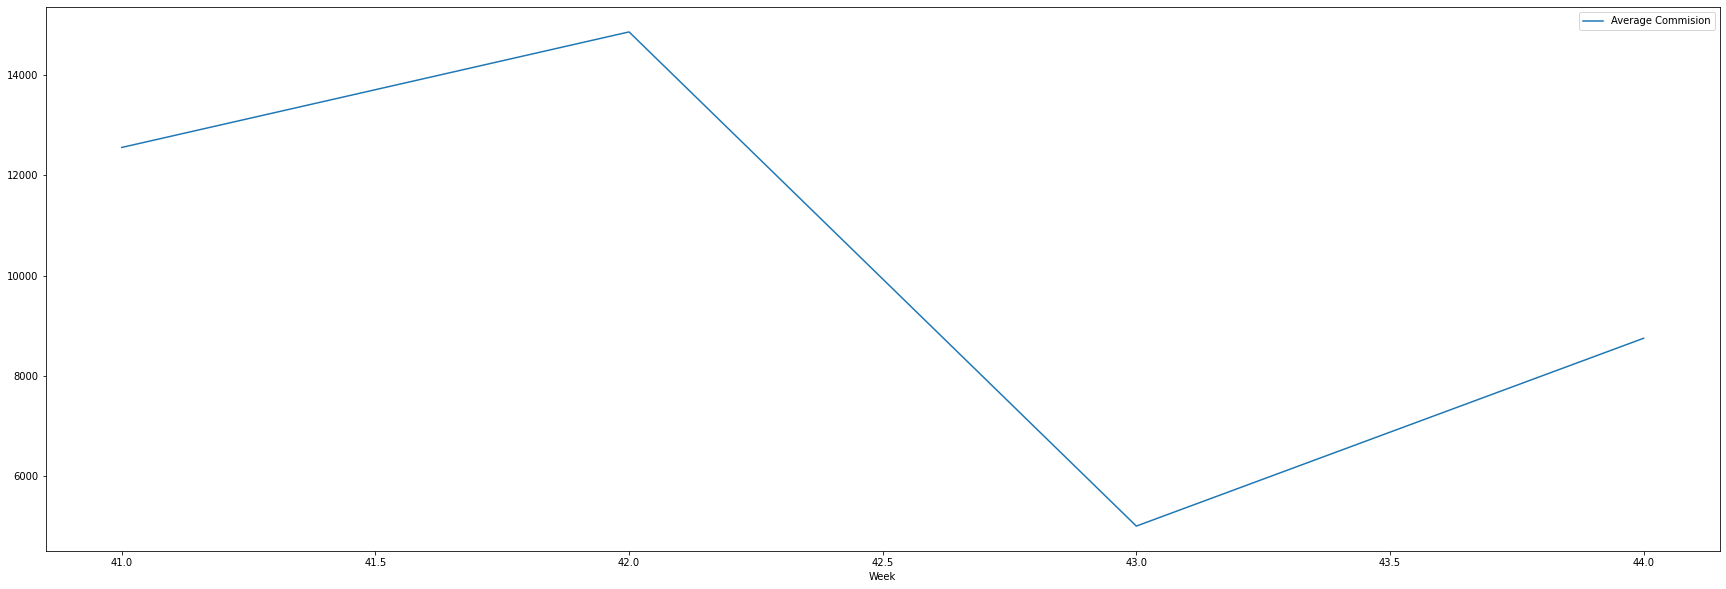

In [15]:
#getting the values for specific months
com_oct = com_mth[com_mth['Month']==10]
com_oct = com_oct.sort_values(by='Week')
com_oct = com_oct.drop(columns=['Month'])
com_oct

#getting the values for each week
wk1 = com_oct[com_oct['Week']== 1]
wk1

wk2 = com_oct[com_oct['Week']== 2]
wk2

wk3 = com_oct[com_oct['Week']== 3]
wk3 

wk4 = com_oct[com_oct['Week']== 4]
wk4


d = {'Week': [41, 42, 43, 44], 
     'Average Commision': [ wk1['Commission Earned'].mean(),
                            wk2['Commission Earned'].mean(),
                            wk3['Commission Earned'].mean(),
                            wk4['Commission Earned'].mean()]}

octAvgComm = pd.DataFrame(data=d)
octAvgComm
octAvg_graph = octAvgComm.plot.line(x='Week', y='Average Commision', figsize=(30,10))

# NOVEMBER <a class="anchor" id="nov"></a>

,Week,fscName,crop,Commission Earned,Total
358,1,JAMES KIPTOO,Potatoes,10000.0,7
363,1,PETER KIRAGU,Potatoes,14400.0,3
359,1,JONATHAN SUTER,Potatoes,15300.0,10
362,1,JOHN KIARIE,Potatoes,500.0,1
360,1,ROLLY ACHIENG OTIENO,Sorghum,30000.0,15
361,1,ROSE NDOLO,Maize,3000.0,10
371,2,JOEL TONUI,Potatoes,18000.0,5
367,2,JOSEPH NDIRANGU,Potatoes,14000.0,5
366,2,JONATHAN SUTER,Potatoes,10000.0,9
373,2,VINCENT KOECH,Potatoes,21500.0,5


,Week,fscName,crop,Commission Earned,Total
358,1,JAMES KIPTOO,Potatoes,10000.0,7
363,1,PETER KIRAGU,Potatoes,14400.0,3
359,1,JONATHAN SUTER,Potatoes,15300.0,10
362,1,JOHN KIARIE,Potatoes,500.0,1
360,1,ROLLY ACHIENG OTIENO,Sorghum,30000.0,15
361,1,ROSE NDOLO,Maize,3000.0,10


,Week,fscName,crop,Commission Earned,Total
371,2,JOEL TONUI,Potatoes,18000.0,5
367,2,JOSEPH NDIRANGU,Potatoes,14000.0,5
366,2,JONATHAN SUTER,Potatoes,10000.0,9
373,2,VINCENT KOECH,Potatoes,21500.0,5
372,2,JOSEPH KOECH,Potatoes,21800.0,6
365,2,JAMES KIPTOO,Potatoes,1000.0,1
370,2,JOSEPH KOECH,Potatoes,8000.0,2
375,2,ROLLY ACHIENG OTIENO,Sorghum,35000.0,20
369,2,NOAH RONO,Potatoes,6000.0,1
368,2,JOSEPH NDIRANGU,Potatoes,7000.0,2


,Week,fscName,crop,Commission Earned,Total
376,3,ALEX MACHARIA,Potatoes,10000.0,2
386,3,PHILLIMON LANGAT,Maize,10000.0,5
382,3,ROBERT KOSKEI,Potatoes,11000.0,3
378,3,MIKE TESOT,Potatoes,11500.0,4
385,3,ALEX MACHARIA,Maize,12000.0,1
377,3,RICHARD MBARIA,Potatoes,12500.0,4
380,3,NOAH RONO,Potatoes,12500.0,4
383,3,NOAH RONO,Maize,24000.0,2
384,3,COLLINS ROTICH,Maize,18000.0,3
379,3,JOSEPH NDIRANGU,Potatoes,19000.0,7


,Week,fscName,crop,Commission Earned,Total
388,4,RICHARD MBARIA,Potatoes,7500.0,2
391,4,MIKE TESOT,Potatoes,16000.0,5
392,4,VINCENT KOECH,Potatoes,16000.0,7
394,4,JAMES KIPTOO,Potatoes,11600.0,7
387,4,RINA MUKUNGU,Soya,1900.0,20
393,4,JOHN MAINA MWANGI,Potatoes,23000.0,5
389,4,JOSEPH NDIRANGU,Potatoes,8000.0,4
390,4,NOAH RONO,Potatoes,14000.0,4


,Week,Average Commision
0,45,12200.000000
1,46,14833.333333
2,47,13590.909091
3,48,12250.000000


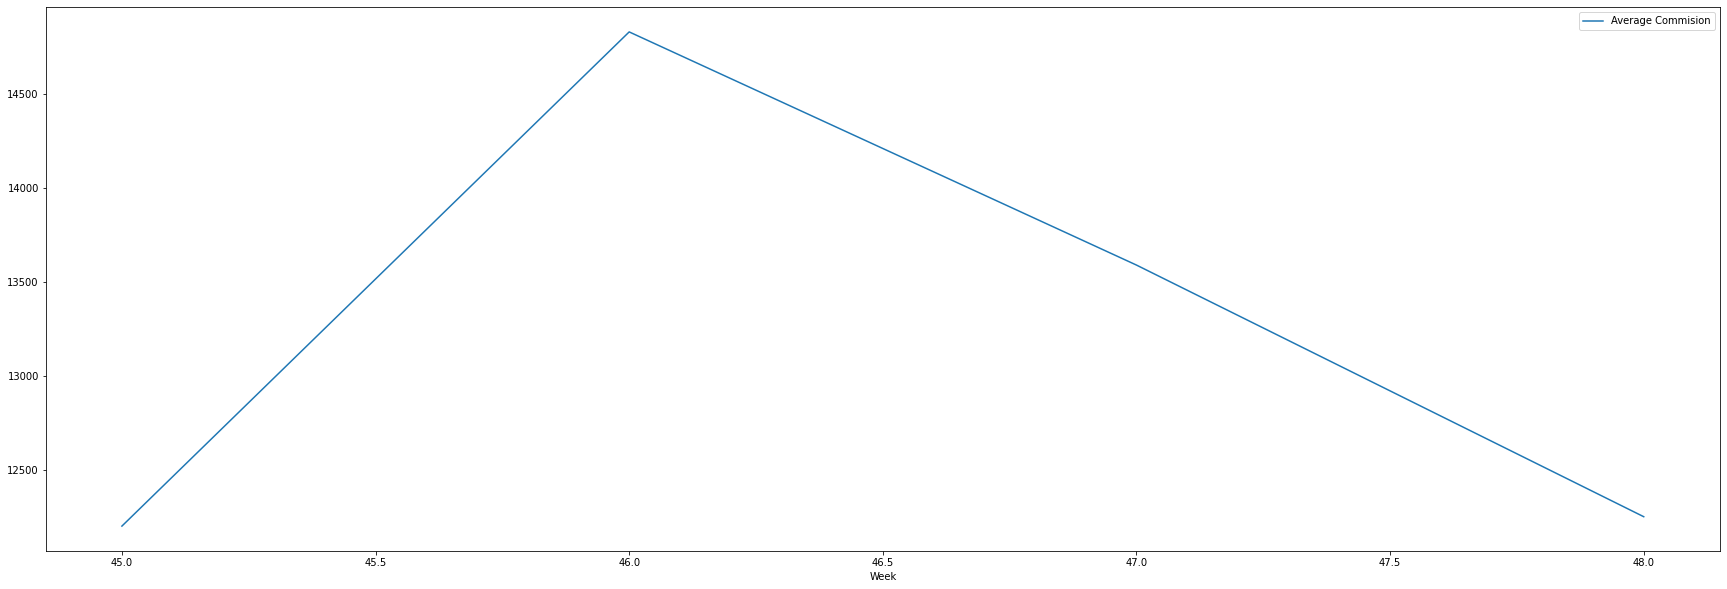

In [16]:
#getting the values for specific months
com_nov = com_mth[com_mth['Month']==11]
com_nov = com_nov.sort_values(by='Week')
com_nov = com_nov.drop(columns=['Month'])
com_nov

#getting the values for each week
wk1 = com_nov[com_nov['Week']== 1]
wk1

wk2 = com_nov[com_nov['Week']== 2]
wk2

wk3 = com_nov[com_nov['Week']== 3]
wk3 

wk4 = com_nov[com_nov['Week']== 4]
wk4


d = {'Week': [45, 46, 47, 48], 
     'Average Commision': [ wk1['Commission Earned'].mean(),
                             wk2['Commission Earned'].mean(),
                             wk3['Commission Earned'].mean(),
                             wk4['Commission Earned'].mean()]}

novAvgComm = pd.DataFrame(data=d)
novAvgComm
novAvg_graph = novAvgComm.plot.line(x='Week', y='Average Commision', figsize=(30,10))

In [17]:
# FINAL QUARTER AVERAGE<a class="anchor" id="fiqa"></a>

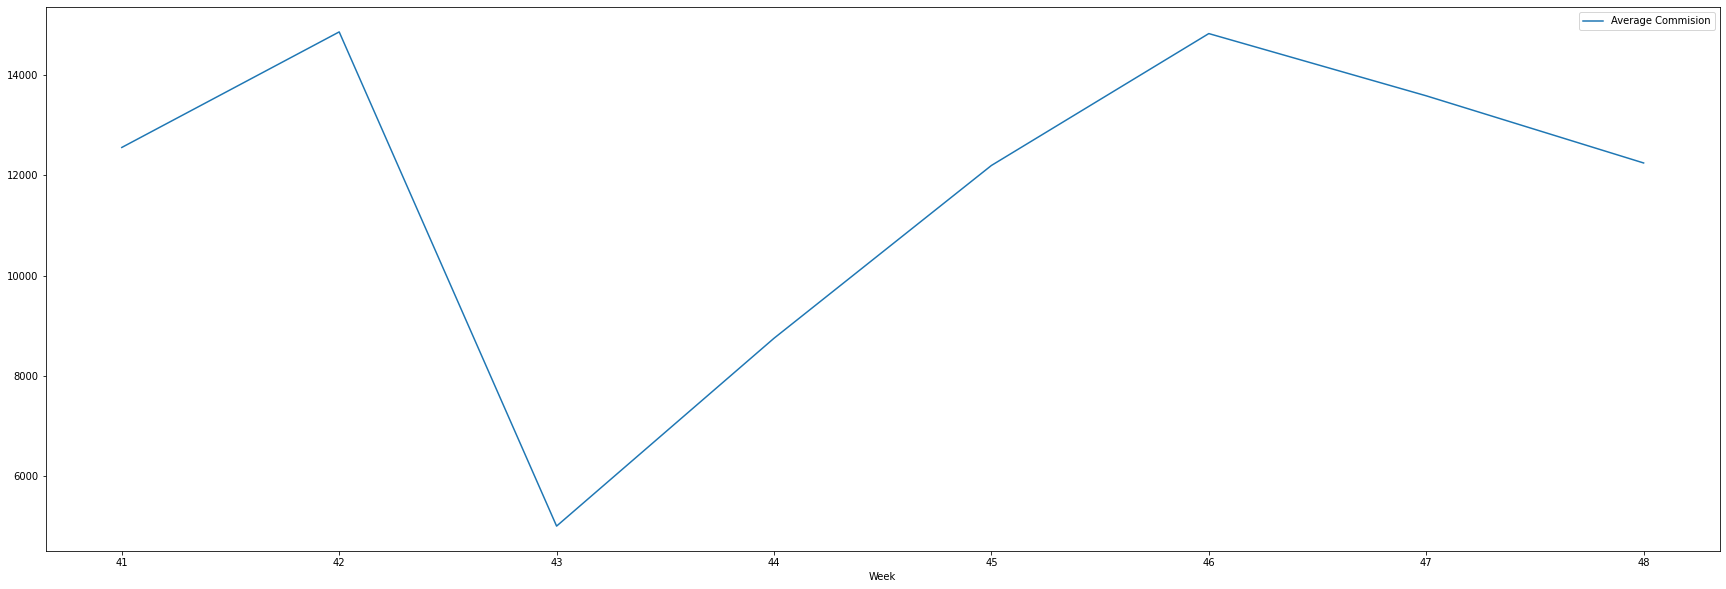

In [18]:
finQuarter = [octAvgComm, novAvgComm]

finQ = pd.concat(finQuarter)

finQgraph = finQ.plot.line(x='Week', y='Average Commision', figsize=(30,10))

# FULL YEAR AVERAGE<a class="anchor" id="fya"></a>

,Week,Average Commision
0,32,9038.811111
1,33,12689.428571
2,34,25043.547170
3,35,20738.839286
0,36,20010.650000
1,37,26363.310345
2,38,22776.206897
3,39,53916.666667
4,40,17000.000000
0,41,12559.785714


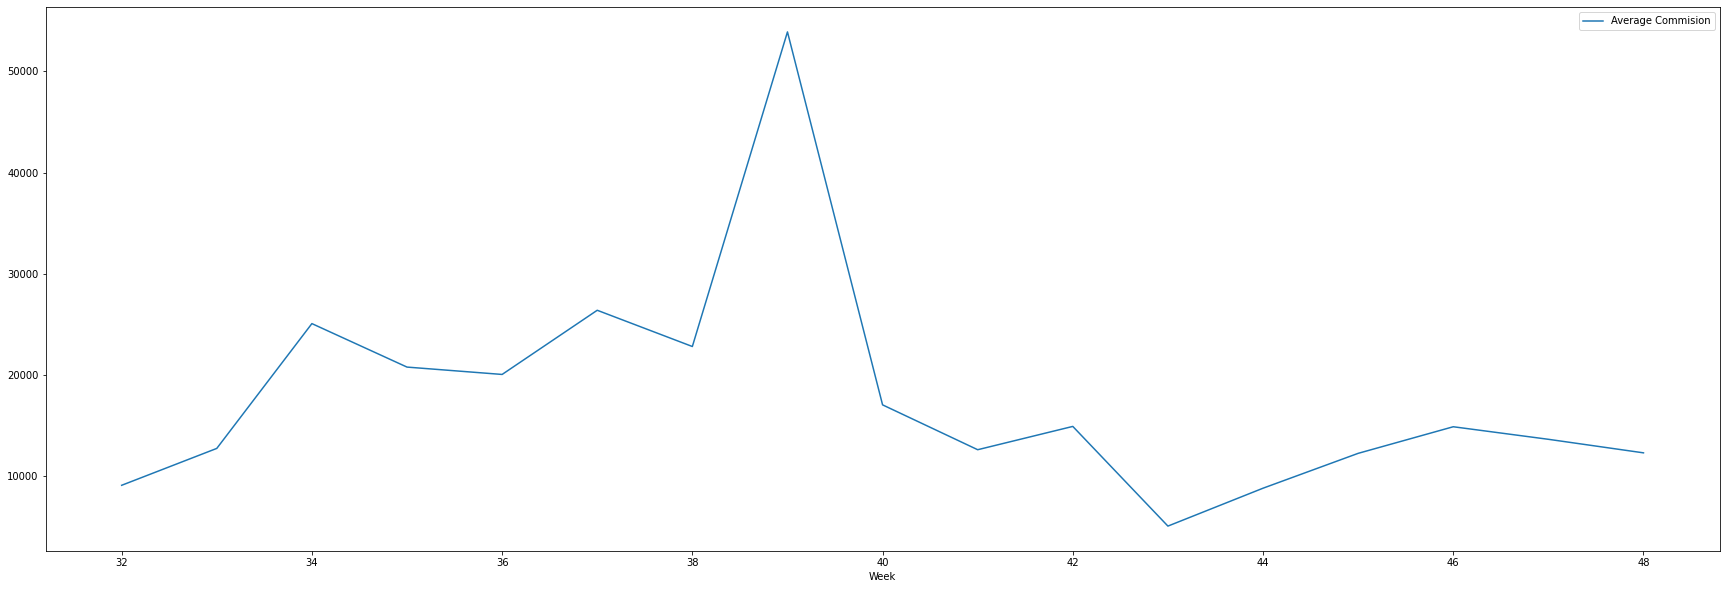

In [19]:
fya = pd.concat([augAvgComm, sepAvgComm, octAvgComm, novAvgComm])
fya

fyaGraph = fya.plot.line(x='Week', y='Average Commision', figsize=(30,10))

,Week,Average Commision
0,32,9038.811111
1,33,12689.428571
2,34,25043.547170
3,35,20738.839286
0,36,20010.650000
1,37,26363.310345
2,38,22776.206897
3,39,53916.666667
4,40,17000.000000
0,41,12559.785714


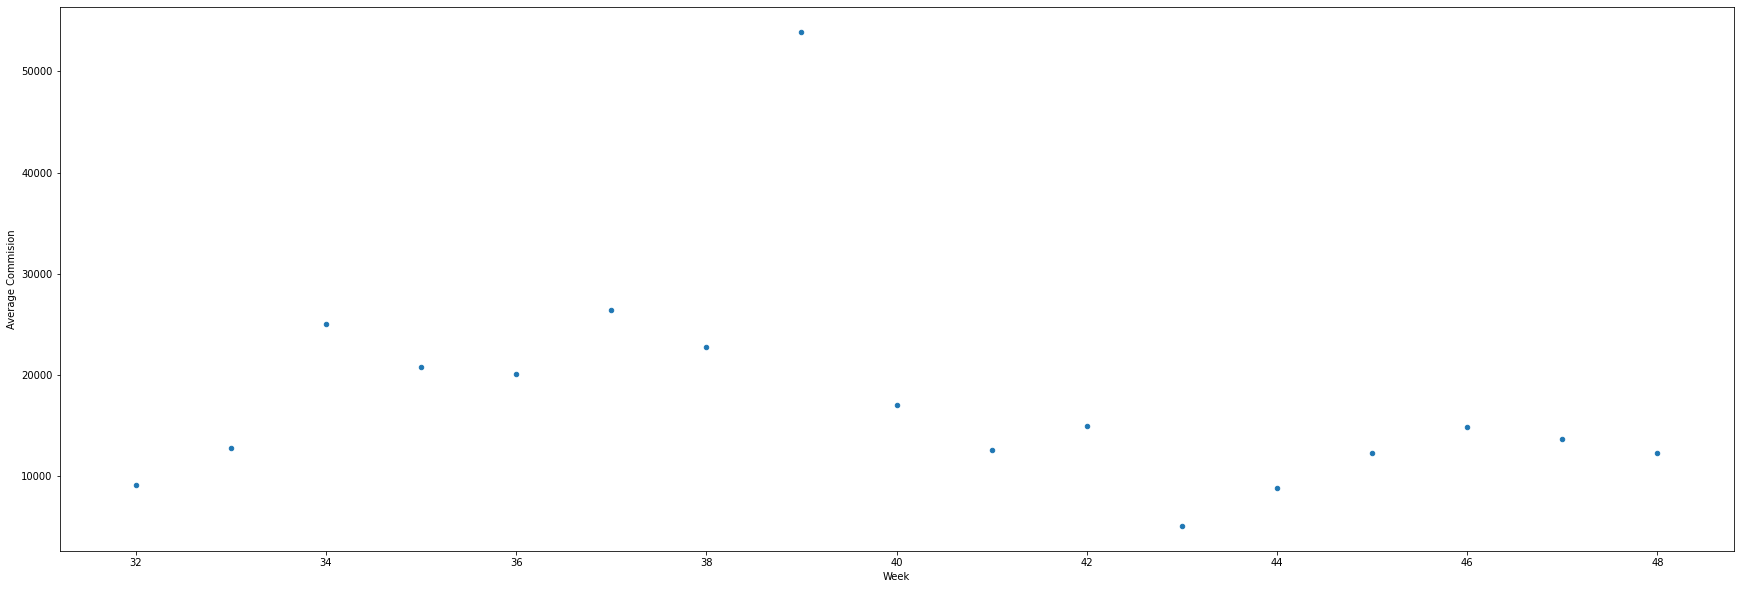

In [20]:
fya = pd.concat([augAvgComm, sepAvgComm, octAvgComm, novAvgComm])
fya

fyaGraph = fya.plot.scatter(x='Week', y='Average Commision', figsize=(30,10))

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Week', ylabel='Average Commision'>

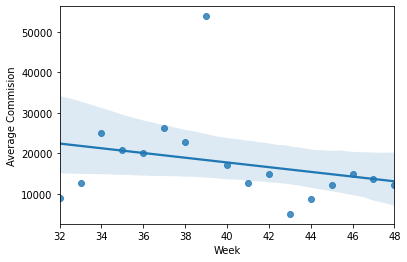

In [21]:
sns.regplot(fya['Week'],fya['Average Commision'])

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Week', ylabel='Average Commision'>

(array([32., 34., 36., 38., 40., 42., 44., 46., 48.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Average Commission earned by FSCs over the year (Aggregation)')

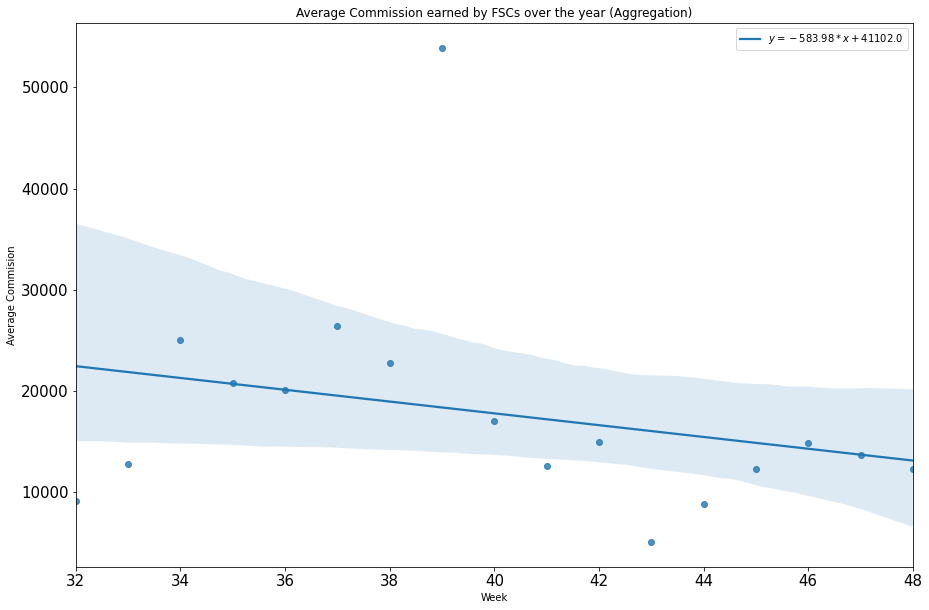

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
slope, intercept, r_value, pv, se = stats.linregress(fya['Week'], fya['Average Commision'])
sns.regplot(fya['Week'], fya['Average Commision'], line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})
plt.xticks(fontsize=15)
plt.legend()
plt.yticks(fontsize=15)
plt.title("Average Commission earned by FSCs over the year (Aggregation)")

In [23]:
fya

,Week,Average Commision
0,32,9038.811111
1,33,12689.428571
2,34,25043.547170
3,35,20738.839286
0,36,20010.650000
1,37,26363.310345
2,38,22776.206897
3,39,53916.666667
4,40,17000.000000
0,41,12559.785714
